In [1]:
### Cargar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sympy as sp
from sympy import *
init_printing(use_unicode=True)

## Primer Punto

### Caso 2D

In [3]:
## Cargar información
data = pd.DataFrame(pd.read_csv('data.txt',index_col='particula')).iloc[:,0:3]
data

,masas,x,y
particula,,,
1,2.0,-53.0,79.0
2,2.0,13.0,-142.0
3,2.0,-109.0,-103.0
4,2.0,4.0,-96.0
5,4.0,222.0,-22.0
...,...,...,...
1529,3.0,1646.0,1612.0
1530,2.0,1610.0,1650.0
1531,5.0,1626.0,1537.0


In [4]:
## Cálcular las medias 
means = list(np.mean(data,axis=0).values)
means

In [5]:
## Momento cero, es la masa total del sistema
mu_0 = np.sum(data.masas.values)
mu_0

In [6]:
## Momento 1: Centro de masa del sistema. 
X = data.iloc[:,1:] - means[1:]
X

,x,y
particula,,
1,-874.973907,-696.870189
2,-808.973907,-917.870189
3,-930.973907,-878.870189
4,-817.973907,-871.870189
5,-599.973907,-797.870189
...,...,...
1529,824.026093,836.129811
1530,788.026093,874.129811
1531,804.026093,761.129811


In [7]:
X.multiply(data.masas,axis=0)

,x,y
particula,,
1,-1749.947815,-1393.740378
2,-1617.947815,-1835.740378
3,-1861.947815,-1757.740378
4,-1635.947815,-1743.740378
5,-2399.895629,-3191.480757
...,...,...
1529,2472.078278,2508.389432
1530,1576.052185,1748.259622
1531,4020.130463,3805.649054


In [8]:
mu_1 = list(np.sum(X.multiply(data.masas,axis=0),axis=0).values)/mu_0
mu_1

array([3.84130767, 1.04833255])

In [9]:
df = pd.DataFrame(mu_1).T
df.columns={'x','y'}
df 

,x,y
0,3.841308,1.048333


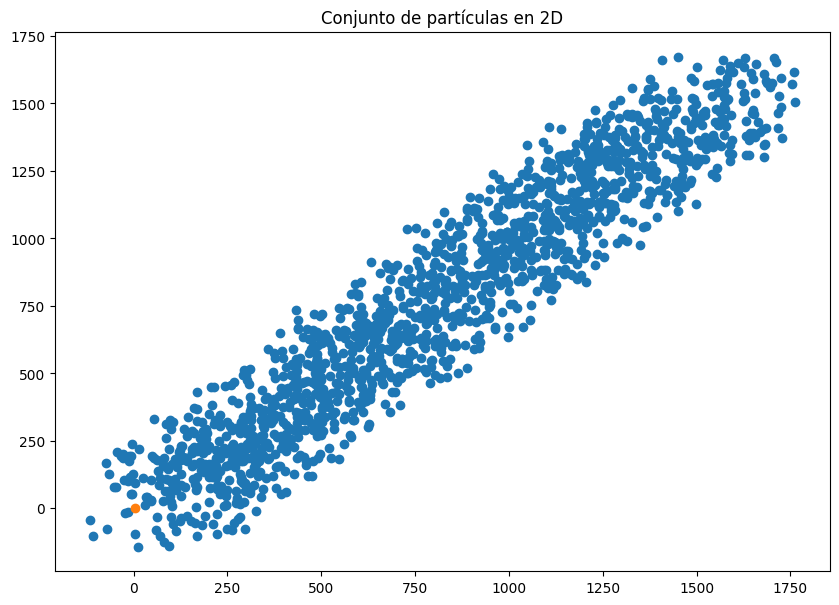

In [10]:
# defining all 3 axis
x = data.x
y = data.y

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes()
 
# Creating plot
plt.scatter(x,y)
plt.scatter(mu_1[0],mu_1[1])
plt.title("Conjunto de partículas en 2D")
 
# show plot
plt.show()

In [10]:
X.cov()

,x,y
x,203443.473209,193035.028595
y,193035.028595,204342.264470


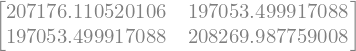

In [11]:
vi = pd.DataFrame(data.masas.values).values
Y = data.iloc[:,1:] - means[1:]
x1 = pd.DataFrame(Y.x.values)
x2 = pd.DataFrame(Y.y.values)

a11 = np.sum(vi*pd.DataFrame(x1*x1))/mu_0
a12 = np.sum(vi*pd.DataFrame(x1*x2))/mu_0

a21 = np.sum(vi*pd.DataFrame(x2*x1))/mu_0
a22 = np.sum(vi*pd.DataFrame(x2*x2))/mu_0


M = Matrix([[a11, a12],[a21,a22]])
M

In [12]:
evals = M.eigenvals()
evals 

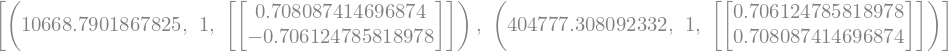

In [13]:
evec = M.eigenvects() 
evec

In [14]:
evec[0][2][0][0]

In [15]:
A = Matrix([[evec[0][2][0][0]],[evec[0][2][0][1]]])
B = Matrix([[evec[1][2][0][0]],[evec[1][2][0][1]]])

print(A,B)
print(A.dot(B))
 

Matrix([[0.708087414696874], [-0.706124785818978]]) Matrix([[0.706124785818978], [0.708087414696874]])
0


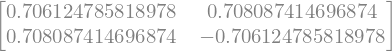

In [16]:
W = Matrix([[evec[1][2][0][0],evec[0][2][0][0]],[evec[1][2][0][1],evec[0][2][0][1]]])
W

In [18]:
X_new = np.matmul(X,W)
X_new

,0,1
particula,,
1,-1111.28577356947,-127.480698925274
2,-1221.16885635343,75.3066481107137
3,-1279.70067105016,-38.6188831292450
4,-1194.95195834974,36.4521212307690
5,-988.618286353636,138.561943484083
...,...,...
1529,1173.91824426728,-6.92947801577918
1530,1175.40507373628,-59.2533668059878
1531,1106.68919244864,31.8681326267067


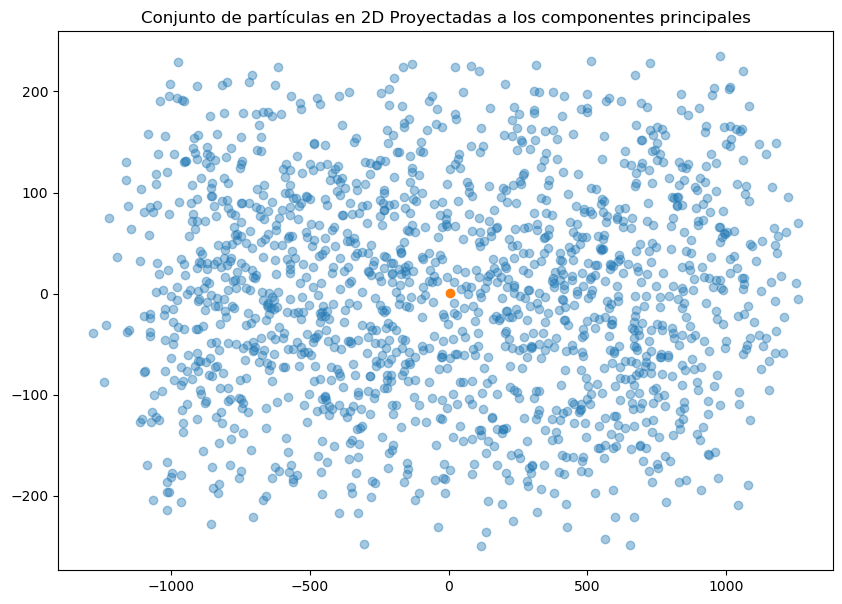

In [318]:
# defining all 3 axis
x = X_new.iloc[:,0]
y = X_new.iloc[:,1]

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes()
 
# Creating plot
plt.scatter(x,y,alpha=0.4)
plt.scatter(mu_1[0],mu_1[1])
plt.title("Conjunto de partículas en 2D Proyectadas a los componentes principales")
 
# show plot
plt.show()

### Caso 3D

In [19]:
## Cargar información
data = pd.read_csv('data.txt',index_col='particula')
data

,masas,x,y,z
particula,,,,
1,2.0,-53.0,79.0,-91.0
2,2.0,13.0,-142.0,-177.0
3,2.0,-109.0,-103.0,-120.0
4,2.0,4.0,-96.0,110.0
5,4.0,222.0,-22.0,-236.0
...,...,...,...,...
1529,3.0,1646.0,1612.0,-30.0
1530,2.0,1610.0,1650.0,-145.0
1531,5.0,1626.0,1537.0,96.0


In [20]:
## Cálcular las medias 
means = list(np.mean(data,axis=0).values)
means

In [21]:
## Momento cero, es la masa total del sistema
mu_0 = np.sum(data.masas.values)
mu_0

In [22]:
## Momento 1: Centro de masa del sistema. 
X = data.iloc[:,1:] - means[1:]
X

,x,y,z
particula,,,
1,-874.973907,-696.870189,-106.063275
2,-808.973907,-917.870189,-192.063275
3,-930.973907,-878.870189,-135.063275
4,-817.973907,-871.870189,94.936725
5,-599.973907,-797.870189,-251.063275
...,...,...,...
1529,824.026093,836.129811,-45.063275
1530,788.026093,874.129811,-160.063275
1531,804.026093,761.129811,80.936725


In [23]:
X.multiply(data.masas,axis=0)

,x,y,z
particula,,,
1,-1749.947815,-1393.740378,-212.126549
2,-1617.947815,-1835.740378,-384.126549
3,-1861.947815,-1757.740378,-270.126549
4,-1635.947815,-1743.740378,189.873451
5,-2399.895629,-3191.480757,-1004.253098
...,...,...,...
1529,2472.078278,2508.389432,-135.189824
1530,1576.052185,1748.259622,-320.126549
1531,4020.130463,3805.649054,404.683627


In [24]:
mu_1 = list(np.sum(X.multiply(data.masas,axis=0),axis=0).values)/mu_0
mu_1

array([3.84130767, 1.04833255, 0.44007528])

In [25]:
df = pd.DataFrame(mu_1).T
df.columns={'x','y','z'}
df 

,y,z,x
0,3.841308,1.048333,0.440075


In [26]:
# defining all 3 axis
z = data.z
x = data.x
y = data.y

import plotly.express as px
fig = px.scatter_3d(data, x='x', y='y', z='z',opacity=0.2)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))


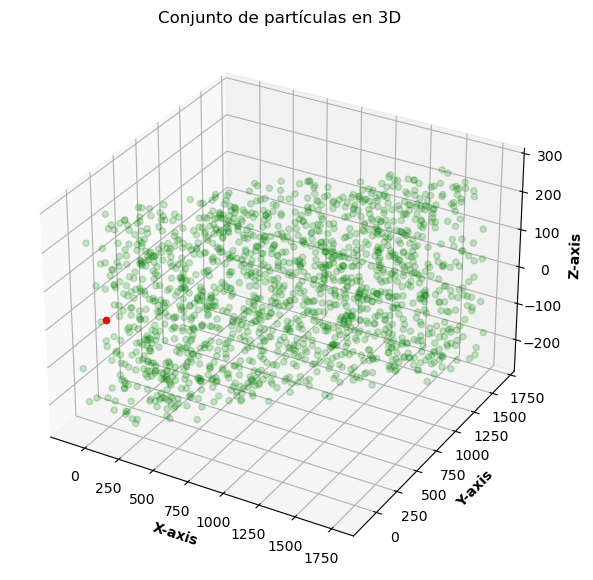

In [27]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green",alpha=0.2)
ax.scatter3D(mu_1[0], mu_1[1], mu_1[2], color = "red")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.title("Conjunto de partículas en 3D")
 
# show plot
plt.show()

In [28]:
## Separar cada categoría en diferentes valores y cada uno como una matrix
vi = pd.DataFrame(data.masas.values).values
Y = data.iloc[:,1:] - means[1:]
x1 = Y.x.values
x2 = Y.y.values
x3 = Y.z.values

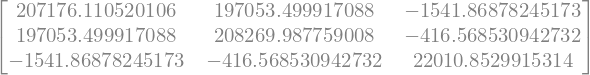

In [47]:
a11 = np.sum(vi*pd.DataFrame(x1*x1))/mu_0
a12 = np.sum(vi*pd.DataFrame(x1*x2))/mu_0
a13 = np.sum(vi*pd.DataFrame(x1*x3))/mu_0

a21 = np.sum(vi*pd.DataFrame(x2*x1))/mu_0
a22 = np.sum(vi*pd.DataFrame(x2*x2))/mu_0
a23 = np.sum(vi*pd.DataFrame(x2*x3))/mu_0

a31 = np.sum(vi*pd.DataFrame(x3*x1))/mu_0
a32 = np.sum(vi*pd.DataFrame(x3*x2))/mu_0
a33 = np.sum(vi*pd.DataFrame(x3*x3))/mu_0

M = Matrix([[a11, a12, a13],[a21,a22,a23],[a31,a32,a33]])
M

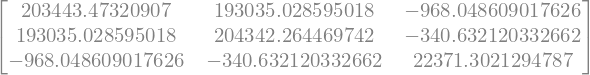

In [37]:
M = Matrix(Y.cov())
M

In [51]:
evals = M.eigenvals()
evals 

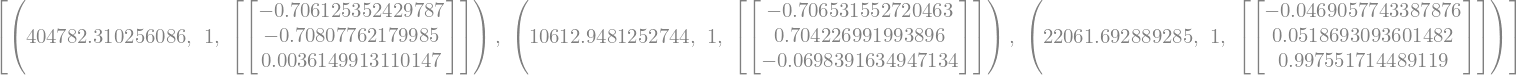

In [52]:
evec = M.eigenvects() 
evec

In [53]:
A = Matrix([[evec[0][2][0][0]],[evec[0][2][0][1]],[evec[0][2][0][2]]])
B = Matrix([[evec[1][2][0][0]],[evec[1][2][0][1]],[evec[1][2][0][2]]])
C = Matrix([[evec[2][2][0][0]],[evec[2][2][0][1]],[evec[2][2][0][2]]])

print(A,B,C)
print(A.dot(B))
print(A.dot(C))
print(B.dot(C))


Matrix([[-0.706125352429787], [-0.708077621799850], [0.00361499131101470]]) Matrix([[-0.706531552720463], [0.704226991993896], [-0.0698391634947134]]) Matrix([[-0.0469057743387876], [0.0518693093601482], [0.997551714489119]])
5.06864515636973e-17
2.16840434497101e-18
0


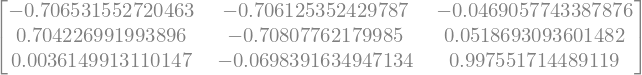

In [55]:
W = Matrix([[evec[1][2][0][0],evec[0][2][0][0],evec[2][2][0][0]],[evec[1][2][0][1],evec[0][2][0][1],evec[2][2][0][1]],[evec[0][2][0][2],evec[1][2][0][2],evec[2][2][0][2]]])
W

In [56]:
X_new = np.matmul(X,W)
X_new

,0,1,2
particula,,,
1,127.058458418151,1118.68681533846,-100.908448220943
2,-75.5176785447978,1234.57386455640,-201.256794141960
3,38.3500780795885,1289.12529798344,-136.650938881702
4,-35.7269504323333,1188.31358220249,87.8486881160330
5,-138.888818511457,1006.14486192878,-263.691335010407
...,...,...,...
1529,6.46184354269807,-1170.76334163210,-40.2350529895997
1530,58.2418811356361,-1164.21827477113,-151.293858523966
1531,-31.7690608972470,-1112.33474754885,82.5043803207939


In [57]:
# defining all 3 axis
x = X_new.iloc[:,0]
y = X_new.iloc[:,1]
z = X_new.iloc[:,2]

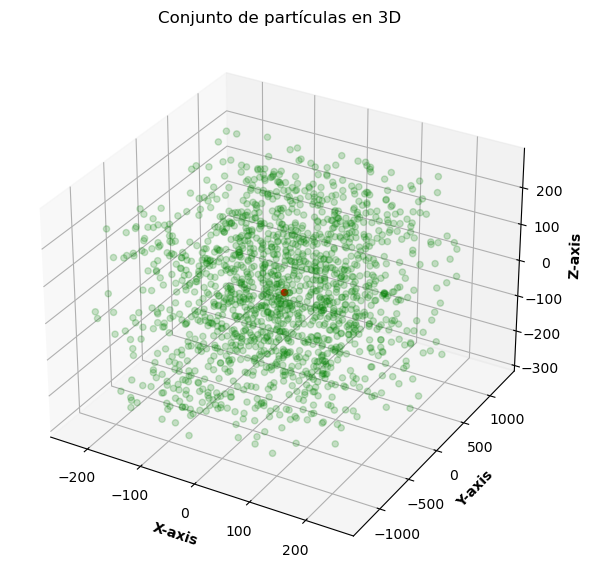

In [58]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green",alpha=0.2)
ax.scatter3D(mu_1[0], mu_1[1], mu_1[2], color = "red")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
plt.title("Conjunto de partículas en 3D")
 
# show plot
plt.show()

## Segundo Punto

In [ ]:
## Desde el 2006 hasta 2021

In [171]:
edu = pd.read_excel('Education.xls')
edu = edu[edu.DataSource == 'Colombia'].values[0][(65-15):-1].tolist()
edu

In [172]:
dfs = pd.read_excel('defense.xls')
dfs = dfs[dfs.Data == 'Colombia'].values[0][(65-15):-1].tolist()
dfs

In [173]:
hlt = pd.read_excel('Health.xls')
hlt = hlt[hlt.DataSource == 'Colombia'].values[0][(64-15):-2].tolist()
hlt

In [174]:
scn = pd.read_excel('Science.xls')
scn  = scn [scn .DataSource == 'Colombia'].values[0][(66-15):].tolist()
scn 

In [176]:
full_data = pd.DataFrame()
full_data['Defensa'] = dfs
full_data['Educación'] = edu
full_data['Ciencia'] = scn
full_data['Salud'] = hlt
full_data

,Defensa,Educación,Ciencia,Salud
0,3.276131,3.91672,3.065264,6.067098
1,3.266740,4.08301,4.015392,6.335515
2,3.744606,3.93878,5.554226,6.491028
3,3.885354,4.77652,5.362535,6.841927
4,3.642756,4.83383,4.679630,7.311347
5,3.081614,4.46608,5.677429,7.071301
6,3.158960,4.37039,7.768437,6.780768
7,3.274401,4.87855,8.119738,6.745996
8,3.108259,4.62946,9.849346,7.017241
9,3.109960,4.47039,10.185785,7.185532


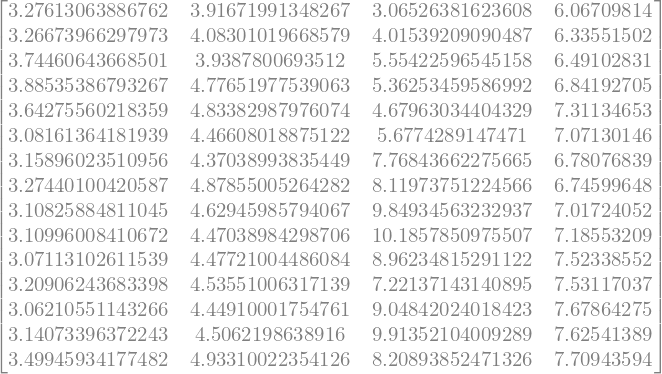

In [177]:
data = Matrix(full_data)
data

In [178]:
print(full_data.cov())

            Defensa  Educación   Ciencia     Salud
Defensa    0.070209   0.010810 -0.313453 -0.033857
Educación  0.010810   0.098868  0.300653  0.099398
Ciencia   -0.313453   0.300653  5.285087  0.790937
Salud     -0.033857   0.099398  0.790937  0.264312


In [179]:
print(full_data.corr())

            Defensa  Educación   Ciencia     Salud
Defensa    1.000000   0.129745 -0.514578 -0.248539
Educación  0.129745   1.000000  0.415921  0.614881
Ciencia   -0.514578   0.415921  1.000000  0.669202
Salud     -0.248539   0.614881  0.669202  1.000000


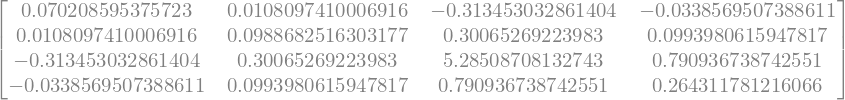

In [180]:
M = Matrix(full_data.cov())
M

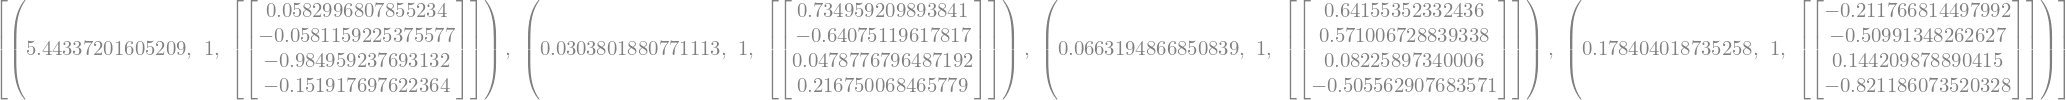

In [181]:
evec = M.eigenvects() 
evec

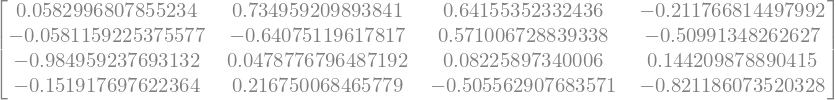

In [189]:
e1 = evec[0][2][0]
e2 = evec[1][2][0]
e3 = evec[2][2][0]
e4 = evec[3][2][0]

## Matrix Transformación
W = Matrix([[e1[0],e2[0],e3[0],e4[0]],
            [e1[1],e2[1],e3[1],e4[1]],
            [e1[2],e2[2],e3[2],e4[2]],
            [e1[3],e2[3],e3[3],e4[3]]])

W